In [47]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv('../data/ml-lab1/winequality-white.csv', sep=';')

In [49]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [51]:
X = df.drop(['pH', 'quality'], axis=1)
y = df['pH']

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, name, X_test_data=X_test_scaled):
    y_pred = model.predict(X_test_data)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r2:.4f}")

    # Визуализация предсказаний
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказанные значения')
    plt.title(f'{name}: Реальные vs Предсказанные')
    plt.show()

    return rmse, mae, r2

In [55]:
results = {}

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

linear_params = {}
linear_grid = GridSearchCV(LinearRegression(), linear_params, cv=5, scoring='neg_mean_squared_error', n_jobs=24)
linear_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=24, param_grid={},
             scoring='neg_mean_squared_error')


linear:
RMSE: 0.1019
MAE: 0.0774
R2: 0.5634


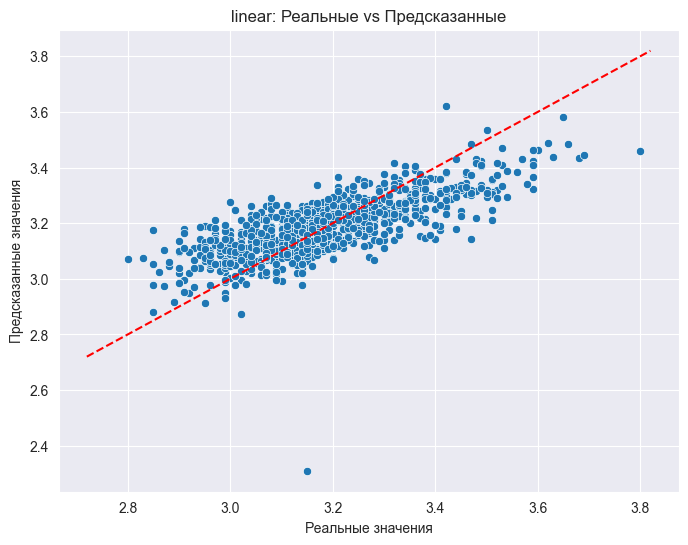

In [67]:
linear_rmse, linear_mae, linear_r2 = evaluate_model(linear_grid.best_estimator_, "linear")
results['linear'] = (linear_rmse, linear_mae, linear_r2)

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_params = {}
poly_grid = GridSearchCV(LinearRegression(), poly_params, cv=5, scoring='neg_mean_squared_error', n_jobs=24)
poly_grid.fit(X_train_poly, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=24, param_grid={},
             scoring='neg_mean_squared_error')


poly:
RMSE: 0.0951
MAE: 0.0719
R2: 0.6196


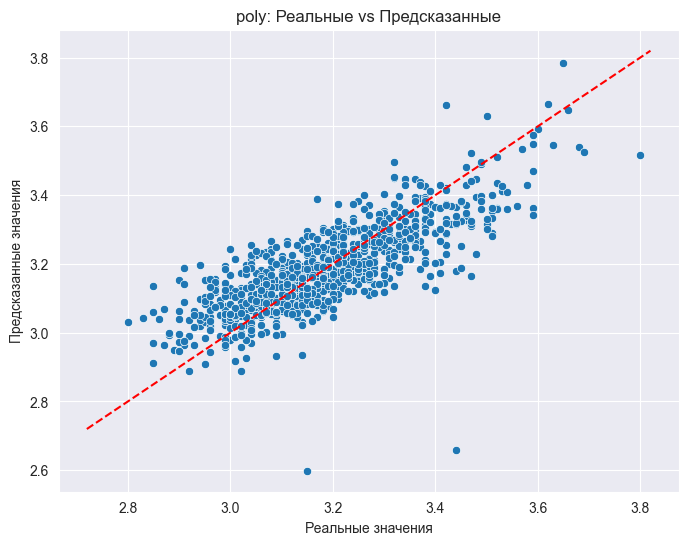

In [69]:
poly_rmse, poly_mae, poly_r2 = evaluate_model(poly_grid.best_estimator_, "poly", X_test_poly)
results['poly'] = (poly_rmse, poly_mae, poly_r2)

In [56]:
from sklearn.gaussian_process import GaussianProcessRegressor

gpr_params = {'alpha': [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gpr_grid = GridSearchCV(GaussianProcessRegressor(), gpr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=24)
gpr_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GaussianProcessRegressor(), n_jobs=24,
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')


GaussianProcessRegressor:
RMSE: 0.5928
MAE: 0.2693
R2: -13.7889


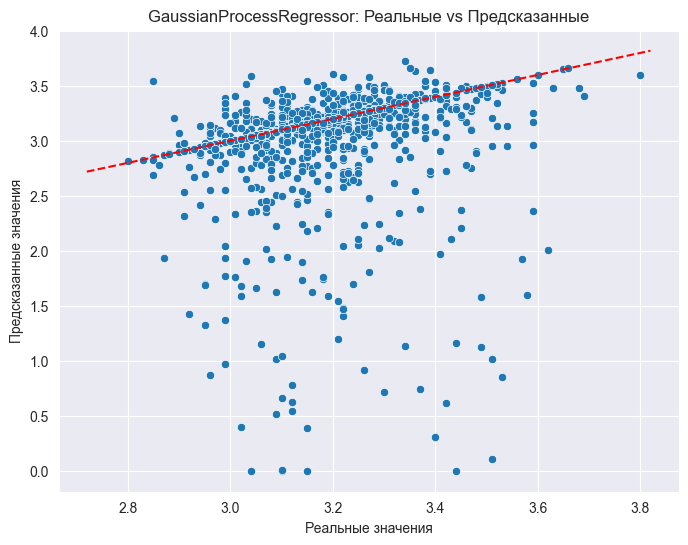

In [57]:
gpr_rmse, gpr_mae, gpr_r2 = evaluate_model(gpr_grid.best_estimator_, "GaussianProcessRegressor")
results['GaussianProcessRegressor'] = (gpr_rmse, gpr_mae, gpr_r2)

In [58]:
from sklearn.svm import SVR

svr_params = {
    'kernel': ['linear', 'poly'],
    'C': [0.01, 0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001],
    'gamma': ['scale']
}
svr_grid = GridSearchCV(SVR(), svr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=24)
svr_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=24,
             param_grid={'C': [0.01, 0.1, 1, 10], 'epsilon': [0.1, 0.01, 0.001],
                         'gamma': ['scale'], 'kernel': ['linear', 'poly']},
             scoring='neg_mean_squared_error')


SVR:
RMSE: 0.1003
MAE: 0.0759
R2: 0.5763


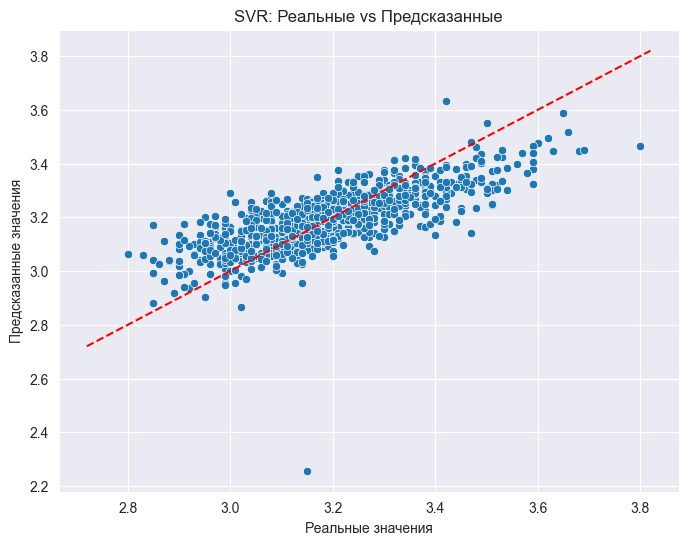

In [59]:
svr_rmse, svr_mae, svr_r2 = evaluate_model(svr_grid.best_estimator_, "SVR")
results['SVR'] = (svr_rmse, svr_mae, svr_r2)

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    'n_estimators': [10, 50, 80, 100, 150, 200],
    'max_depth': [None, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params,
                      cv=3, scoring='neg_mean_squared_error', n_jobs=24)
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=24,
             param_grid={'max_depth': [None, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 50, 80, 100, 150, 200]},
             scoring='neg_mean_squared_error')


RandomForestRegressor:
RMSE: 0.0904
MAE: 0.0628
R2: 0.6565


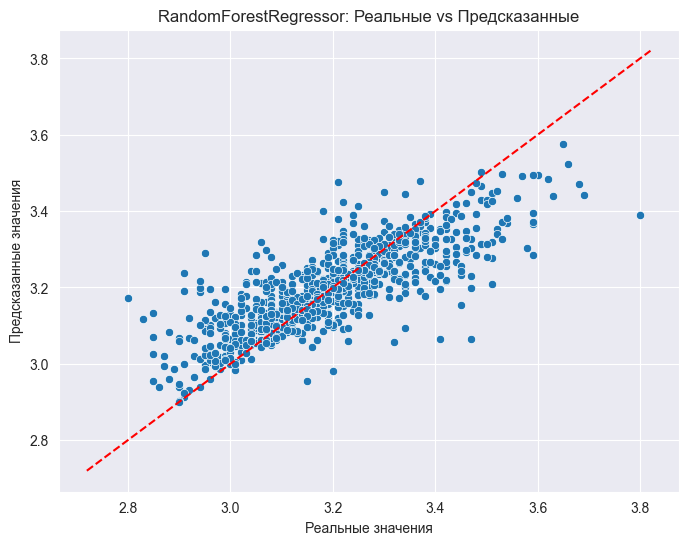

In [61]:
rf_rmse, rf_mae, rf_r2 = evaluate_model(rf_grid.best_estimator_, "RandomForestRegressor")
results['RandomForestRegressor'] = (rf_rmse, rf_mae, rf_r2)

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params,
                      cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')


GradientBoostingRegressor:
RMSE: 0.0858
MAE: 0.0637
R2: 0.6904


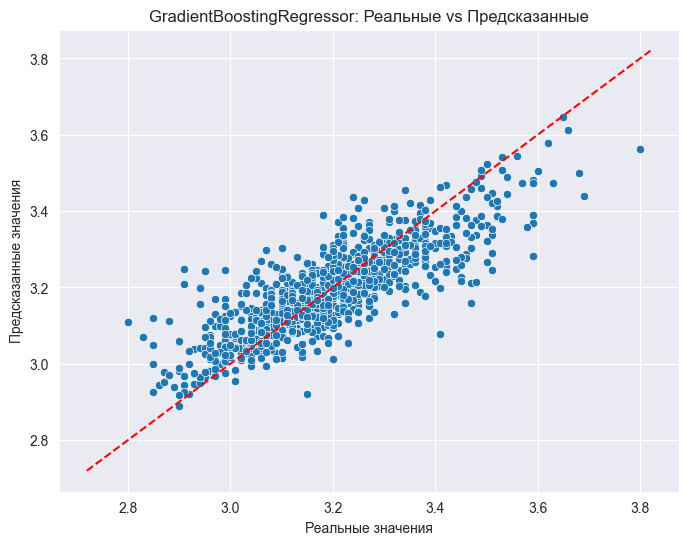

In [63]:
gb_rmse, gb_mae, gb_r2 = evaluate_model(gb_grid.best_estimator_, "GradientBoostingRegressor")
results['GradientBoostingRegressor'] = (gb_rmse, gb_mae, gb_r2)

In [71]:
def plot_feature_importance(importance, names, model_name):
    feature_importance = pd.Series(importance, index=names)
    top_features = feature_importance.nlargest(10)

    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh', title=f'Важность признаков ({model_name})')
    plt.xlabel('Важность')
    plt.ylabel('Признак')
    plt.show()

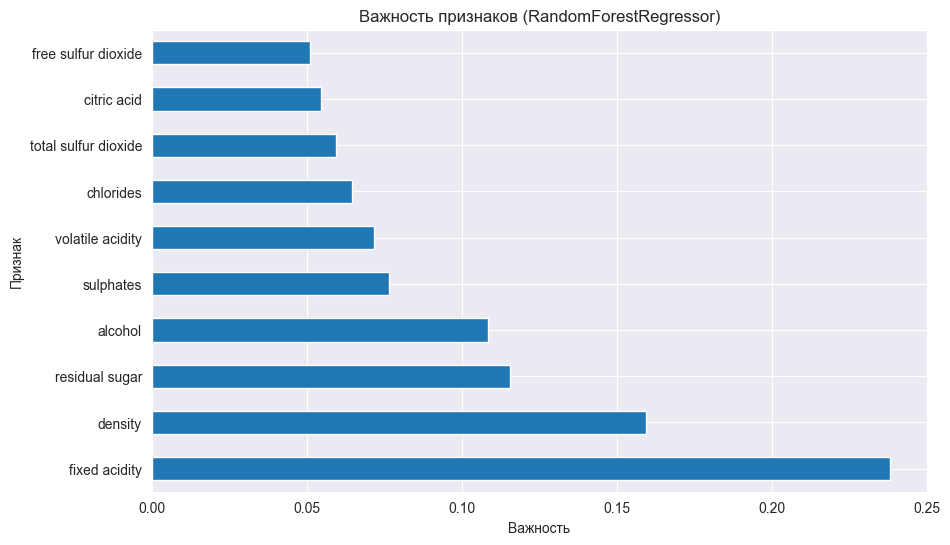

In [72]:
plot_feature_importance(rf_grid.best_estimator_.feature_importances_,
                        X.columns, "RandomForestRegressor")

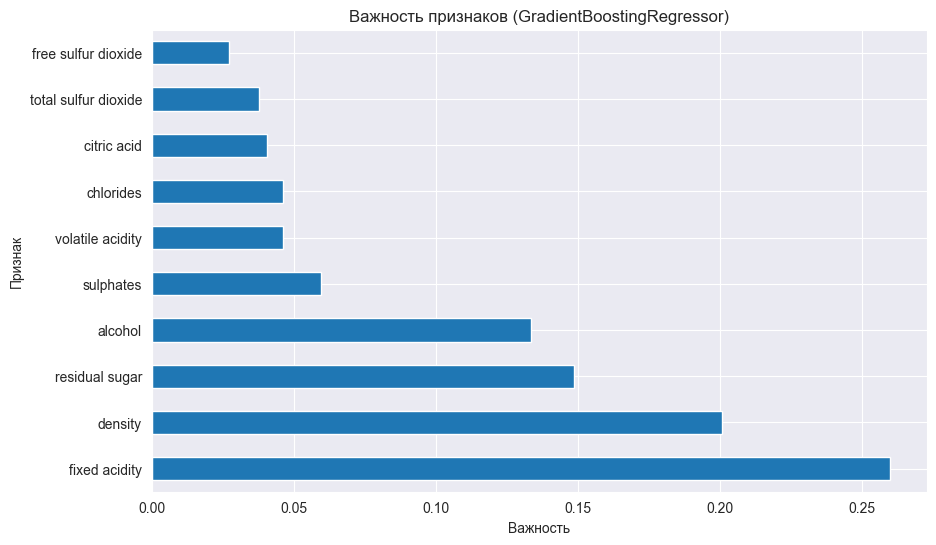

In [73]:
plot_feature_importance(gb_grid.best_estimator_.feature_importances_,
                        X.columns, "GradientBoostingRegressor")

In [79]:
best_model_name = max(results, key=lambda k: results[k][2])
best_model_name

'GradientBoostingRegressor'

In [80]:
best_model = gb_grid.best_estimator_

In [81]:
import pickle

In [82]:
with open('../models/best_wine_quality_model.pkl', 'wb') as f:
    pickle.dump({
        'model': best_model,
        'scaler': scaler,
        'poly': poly if best_model_name == 'poly' else None
    }, f)

In [83]:
results

{'GaussianProcessRegressor': (0.5928268520441181,
  0.2693073964779012,
  -13.78885119634378),
 'SVR': (0.10034035265347299, 0.07588470413764632, 0.5763278157879106),
 'RandomForestRegressor': (0.09035442618728025,
  0.06280714285714296,
  0.6564597953735999),
 'GradientBoostingRegressor': (0.08578058438759419,
  0.06373508314237422,
  0.6903602509498896),
 'linear': (0.10185710991620586, 0.07738631581256332, 0.563422444907204),
 'poly': (0.09507632653799418, 0.07187127776189574, 0.6196149036538366)}